<a href="https://colab.research.google.com/github/suwisitlk/229351-StatisticalLearning/blob/main/229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [2]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-04 02:14:15--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-04 02:14:15 (15.6 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [28]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [29]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


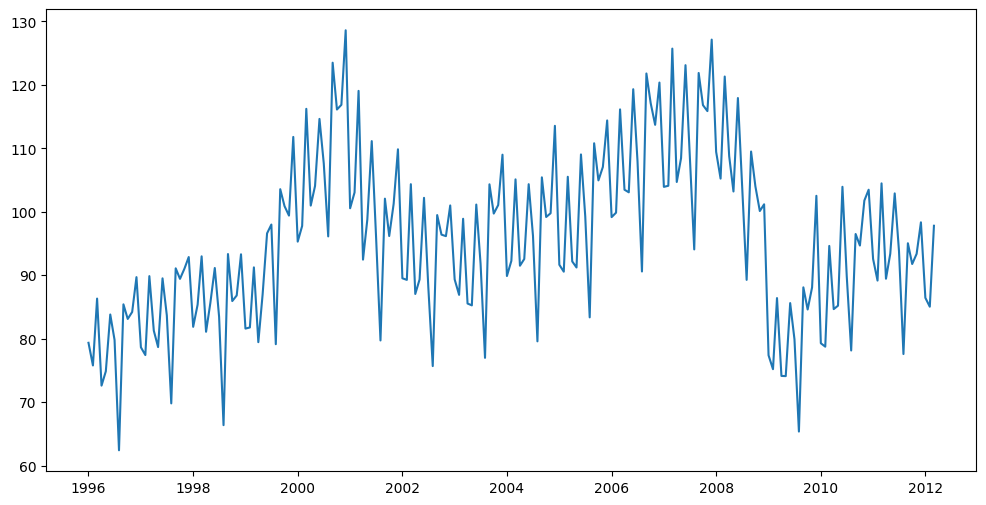

In [30]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [6]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [32]:
data.loc['1996-01-01']

,1996-01-01
Unnamed: 0,1.00
value,79.35


In [7]:
# Add or change values

data.loc['2012-03-02','value'] = 86

data

,Unnamed: 0,value
time,,
1996-01-01,1.0,79.35
1996-02-01,2.0,75.78
1996-03-01,3.0,86.32
1996-04-01,4.0,72.60
1996-05-01,5.0,74.86
...,...,...
2011-12-01,192.0,98.34
2012-01-01,193.0,86.44
2012-02-01,194.0,85.04


# Moving average

In [17]:
# 5 MA
# data['MA'] = data['value'].rolling(window=5, center=True).mean()
# 12 MA
data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.tail(12)

,Unnamed: 0,value,MA
time,,,
2011-05-01,185.0,93.40,94.264167
2011-06-01,186.0,102.90,93.700000
2011-07-01,187.0,93.77,93.230417
2011-08-01,188.0,77.58,92.803333
2011-09-01,189.0,95.04,92.353333
2011-10-01,190.0,91.77,91.931250
2011-11-01,191.0,93.37,NaN
2011-12-01,192.0,98.34,NaN
2012-01-01,193.0,86.44,NaN


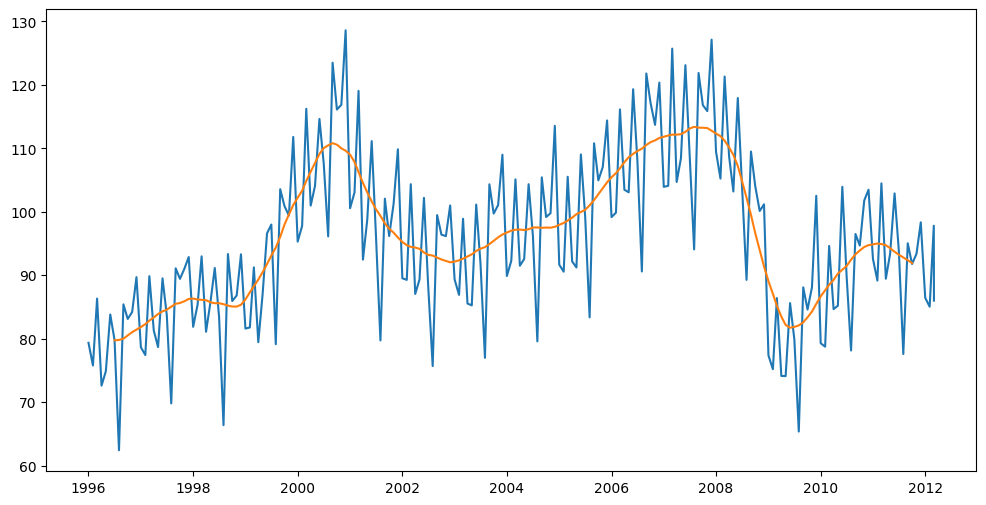

In [18]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

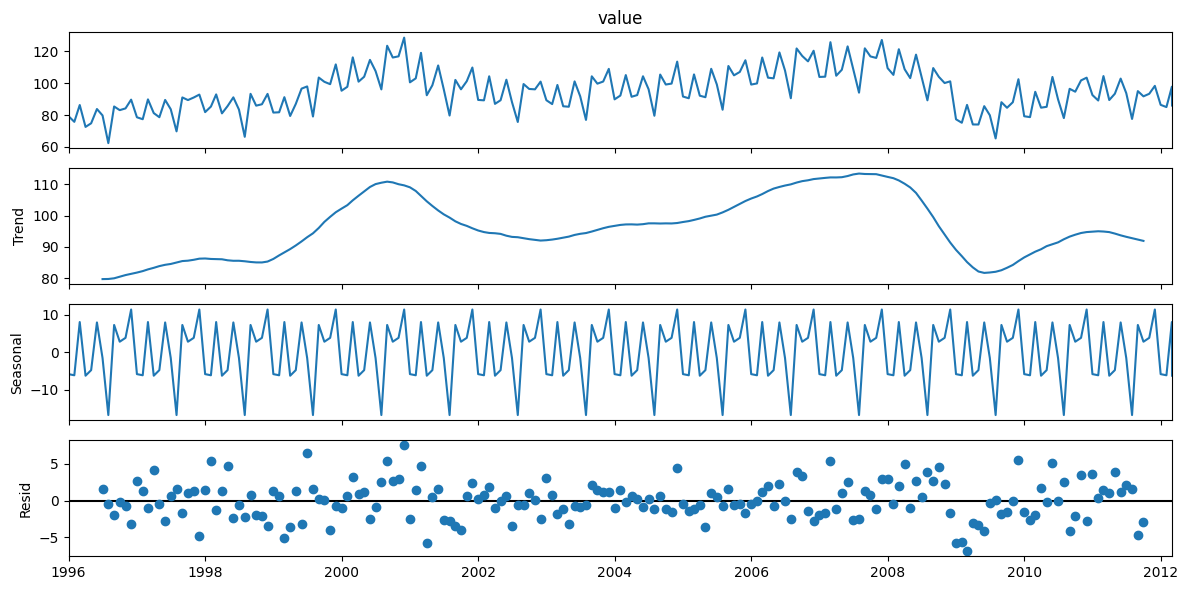

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive', period=12)

result_add.plot();

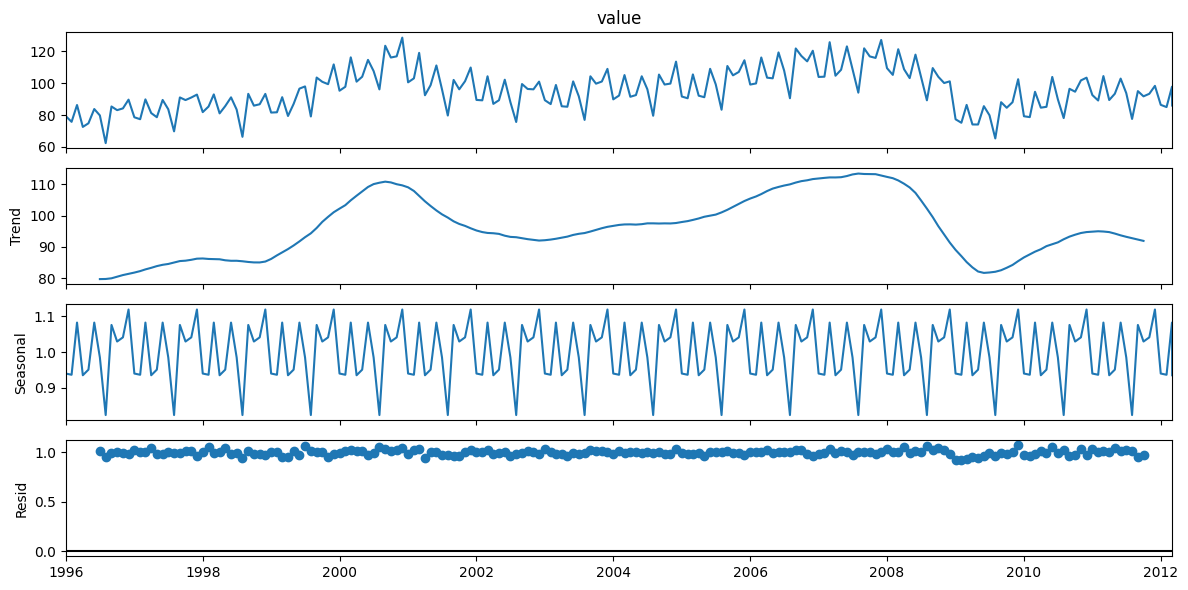

In [24]:
result_mul = seasonal_decompose(data['value'], model='multiplicative', period=12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [25]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: trend, Length: 196, dtype: float64
time
1996-01-01    -5.870942
1996-02-01    -6.182553
1996-03-01     8.099891
1996-04-01    -6.298248
1996-05-01    -4.801748
                ...    
2011-12-01    11.464224
2012-01-01    -5.870942
2012-02-01    -6.182553
2012-03-01     8.099891
2012-03-02    -6.298248
Name: seasonal, Length: 196, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
2012-03-02   NaN
Name: resid, Length: 196, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97.80
2012-03-02    86

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [46]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [47]:
# สร้าง taining set / test set
train = data.loc['1996-01-01':'2009-12-01'].copy()
test  = data.loc['2010-01-01':'2012-03-01'].copy()

In [37]:
# แยกส่วนประกอบ
decomp = seasonal_decompose(train['value'], model='additive', period=12)

In [38]:
T = decomp.trend      # แนวโน้ม
S = decomp.seasonal   # ฤดูกาล
R = decomp.resid      # เศษเหลือ

In [41]:
# ตรวจว่าเรามี 'เดือนล่าสุด' ใน train ที่ยังมีค่า T (ไม่เป็น NaN)
last_T_idx = T.dropna().index.max()   # ดัชนีเวลาของ T_t ตัวล่าสุดในช่วง train ที่ไม่เป็น NaN
# บันทึก level ล่าสุดของชุดที่ปรับฤดูกาลแล้ว A_t = T_t + R_t ณ เดือนนี้
A_last = (T + R).loc[last_T_idx]

In [39]:
def seasonal_value_for_timestamp(ts, seasonal_series):
    month = ts.month
    # ค่าฤดูกาลเฉลี่ยของเดือนนี้ (เผื่อกรณี seasonal_series มีหลายปี)
    return float(seasonal_series[seasonal_series.index.month == month].mean())

In [48]:
# สร้างซีรีส์พยากรณ์สำหรับ test
yhat_test = []
for ts in test.index:
    S_ts = seasonal_value_for_timestamp(ts, S)
    yhat_test.append(A_last + S_ts)

yhat_test = pd.Series(yhat_test, index=test.index, name='yhat')

In [49]:
score_rmse = rmse(test['value'], yhat_test)
print(f"RMSE: {score_rmse:,.4f}")

RMSE: 14.5898


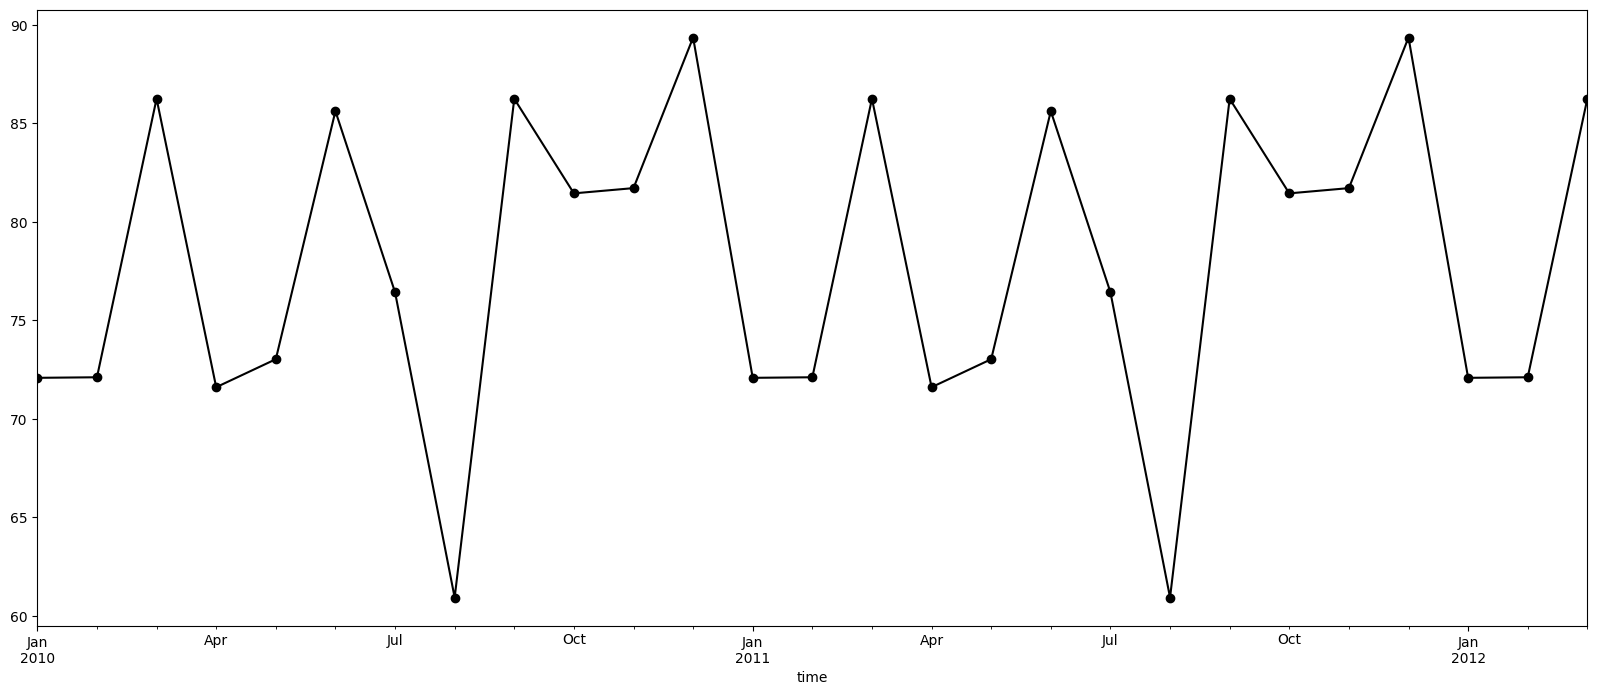

In [52]:
ax = yhat_test.plot(marker='o', color='black', figsize=(20,8))

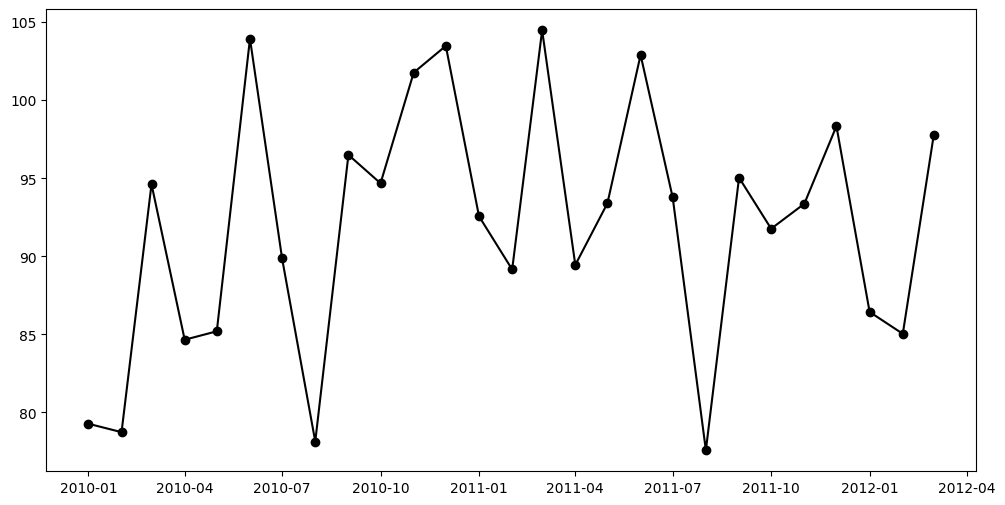

In [56]:
plt.plot(test["value"], label="Actual test",marker='o', color='black')

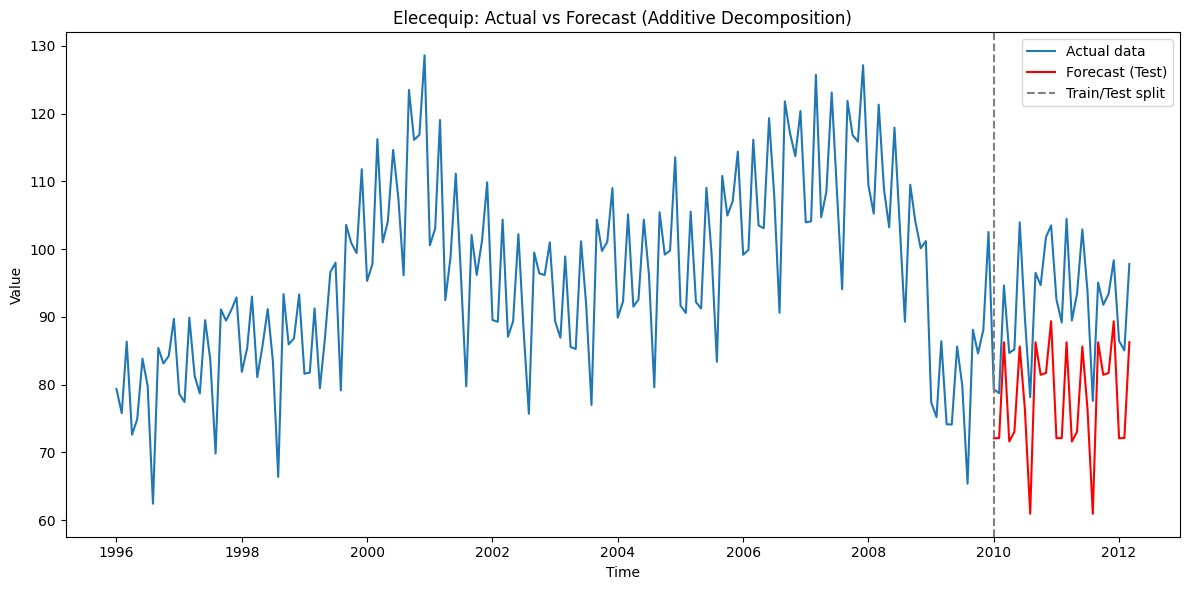

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], label='Actual data')
plt.plot(yhat_test.index, yhat_test.values, label='Forecast (Test)', color='red')
plt.axvline(pd.to_datetime('2010-01-01'), color='gray', linestyle='--', label='Train/Test split')
plt.title("Elecequip: Actual vs Forecast (Additive Decomposition)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()